# Introduction to Random Variables

## Learning Objectives

By the end of this notebook, you will understand:

1. **Mathematical Definition**: What random variables are and how they map outcomes to numerical values
2. **Sample Spaces**: Understanding the domain of random variables and possible outcomes
3. **Discrete Random Variables**: Working with countable outcomes and their probabilities
4. **Probability Mass Functions (PMF)**: The mathematical description of discrete random variable distributions
5. **Practical Applications**: Real-world examples including dice games and two-dice scenarios
6. **Simulation vs Theory**: Understanding the relationship between histograms and theoretical PMFs

## Introduction

A **random variable** is one of the most fundamental concepts in probability theory. Despite its name, a random variable is not actually a variable in the traditional sense, nor is it random. Instead, it's a mathematical function that assigns numerical values to the outcomes of a random experiment.

### Formal Definition

Mathematically, a random variable $X$ is a function that maps each outcome in a sample space $\Omega$ to a real number:

$$X: \Omega \rightarrow \mathbb{R}$$

This mapping allows us to:
- Convert non-numerical outcomes (like coin flips) into numbers
- Apply mathematical operations and statistical analysis
- Calculate probabilities for ranges of values
- Build predictive models

### Why Random Variables Matter

Random variables are essential because they:
1. **Bridge the gap** between abstract probability theory and practical applications
2. **Enable mathematical analysis** of uncertain events
3. **Provide a framework** for statistical inference
4. **Allow us to model** real-world phenomena quantitatively

Let's explore these concepts through hands-on examples and interactive simulations!

## Setting Up the Environment

We'll use standard Python libraries for our probability and statistical computations:

## Example 1: Coin Flipping Experiment

Let's start with a fundamental example - flipping a coin twice. This will illustrate how random variables work in practice.

### Sample Space

For two coin flips, our sample space consists of all possible outcomes:

### Defining a Random Variable

Now let's define a random variable $X$ that counts the number of heads in each outcome:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch 
import pandas as pd
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Creating the Mapping

Let's create a systematic mapping from outcomes to random variable values:

In [3]:
# Sample space for flipping a coin 2 times
sample_space = ["HH", "HT", "TH", "TT"]

This table clearly shows how our random variable $X$ maps each outcome to a numerical value representing the count of heads.

### Finding Specific Outcomes

We can use our random variable to find which outcomes correspond to specific values. For example, let's find all outcomes where $X = 1$ (exactly one head):

In [4]:
# Define a random variable X as the number of Heads in the outcomes
def random_variable_X(outcome):
    return outcome.count("H")

### Computing Probabilities

Now we can calculate the probability distribution of our random variable. For a fair coin, each outcome is equally likely with probability 1/4:

In [5]:
random_variable_X("HT"), random_variable_X("TT"), random_variable_X("HH"), random_variable_X("TH")

(1, 0, 2, 1)

This creates an **inverse mapping** that will be useful for probability calculations. Notice how multiple outcomes can map to the same random variable value.

These probabilities form the **Probability Mass Function (PMF)** of our random variable:
- $P(X = 0) = 0.25$ (no heads)
- $P(X = 1) = 0.50$ (one head) 
- $P(X = 2) = 0.25$ (two heads)

Notice that these probabilities sum to 1, as required for any probability distribution.

## Example 2: Two Dice Roll

Let's explore a more complex example with two six-sided dice. This will introduce multiple random variables defined on the same sample space.

### Multiple Random Variables

From the same sample space, we can define several different random variables:
- $X_1$: Sum of the two dice
- $X_2$: Product of the two dice  
- $X_3$: Maximum of the two dice

Each provides a different numerical perspective on the same outcomes:

In [6]:
# Mapping of outcomes to the random variable values
mapping = {outcome: random_variable_X(outcome) for outcome in sample_space}

### Data Analysis with Random Variables

Let's create a comprehensive dataset and analyze specific values:

These are all the ways to get a sum of 10 with two dice. Notice there are exactly 3 ways out of 36 possible outcomes, giving a probability of 3/36 = 1/12 ≈ 0.083.

### Interactive Exploration

This interactive widget allows you to explore how many ways different sums can occur:

## Understanding PMF vs Histogram

A crucial concept in probability is understanding the difference between:
- **Probability Mass Function (PMF)**: The theoretical probability distribution
- **Histogram**: The empirical distribution from actual data

### Theoretical PMF of a Fair Die

For a fair six-sided die, the theoretical PMF assigns equal probability to each outcome:

### Comparing Theory with Simulation

Now let's see how histograms from actual die rolls compare to the theoretical PMF. As we increase the number of rolls, the histogram should converge to the PMF:

In [7]:
mapping

{'HH': 2, 'HT': 1, 'TH': 1, 'TT': 0}

In [9]:
df = pd.DataFrame(mapping, index=["X"]).T
df.index.name = "Outcome"
df

,X
Outcome,
HH,2
HT,1
TH,1
TT,0


In [10]:
# Find records/samples where X = 1
df["X"] == 1

Outcome
HH    False
HT     True
TH     True
TT    False
Name: X, dtype: bool

In [11]:
df[df["X"] == 1]

,X
Outcome,
HT,1
TH,1


In [12]:
# Calculate probabilities for X = 0, 1, 2

def calculate_probability_X(x, df):
    subset = df[df["X"] == x]
    len_subset = len(subset)
    len_df = len(df)
    return len_subset / len_df

## Summary

In this notebook, we've explored the fundamental concept of random variables through:

### Key Concepts Covered

1. **Mathematical Foundation**: Random variables as functions mapping outcomes to numbers
2. **Sample Spaces**: Understanding the domain of random experiments  
3. **Probability Calculations**: Computing PMFs from inverse mappings
4. **Multiple Variables**: Different random variables on the same sample space
5. **Theory vs Practice**: Comparing theoretical PMFs with empirical histograms

### Important Insights

- **Random variables transform qualitative outcomes into quantitative analysis**
- **The same sample space can support multiple random variables**
- **PMFs provide the theoretical foundation for probability calculations**
- **Histograms converge to PMFs as sample size increases (Law of Large Numbers)**
- **Interactive tools help build intuition about probability distributions**

### Mathematical Relationships

For any discrete random variable $X$:
- $\sum_{x} P(X = x) = 1$ (probabilities sum to 1)
- $P(X = x) \geq 0$ for all $x$ (probabilities are non-negative)
- $P(X \in A) = \sum_{x \in A} P(X = x)$ (probability of sets)

### Next Steps

Now that you understand random variables, you're ready to explore:
- **Continuous random variables** and probability density functions
- **Cumulative distribution functions** for both discrete and continuous variables
- **Common probability distributions** and their applications
- **Joint distributions** and relationships between multiple random variables

Random variables are the building blocks of probability theory - master them, and you'll have a solid foundation for all of statistics and data science!

In [13]:
calculate_probability_X(0, df), calculate_probability_X(1, df), calculate_probability_X(2, df)

(0.25, 0.5, 0.25)

In [14]:
# Store inverse mapping

inverse_mapping = {x: [] for x in range(3)}
for outcome, value in mapping.items():
    inverse_mapping[value].append(outcome)
    
print(inverse_mapping)

{0: ['TT'], 1: ['HT', 'TH'], 2: ['HH']}


In [15]:
def calculate_probability_X(x, inverse_mapping):
    outcomes = inverse_mapping[x]
    len_outcomes = len(outcomes)
    len_sample_space = len(sample_space)
    return len_outcomes / len_sample_space

calculate_probability_X(0, inverse_mapping), calculate_probability_X(1, inverse_mapping), calculate_probability_X(2, inverse_mapping)

(0.25, 0.5, 0.25)

In [21]:
### Two dice example

# Construct the sample space

sample_space = [(i, j) for i in range(1, 7) for j in range(1, 7)]
print(sample_space)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


In [23]:
# Define a random variable X1 as the sum of the outcomes
# Define a random variable X2 as the product of the outcomes
# Define a random variable X3 as the maximum of the outcomes

def random_variable_X1(outcome):
    return sum(outcome)

def random_variable_X2(outcome):
    return outcome[0] * outcome[1]

def random_variable_X3(outcome):
    return max(outcome)

In [24]:
random_variable_X1([1, 2])

3

In [32]:
# Create a heatmap for the sum of the outcomes
df = pd.DataFrame(sample_space, columns=["D1", "D2"])

df["X1"] = df.apply(lambda row: random_variable_X1(row), axis=1)
df.index.name = "Serial No."

In [36]:
df[df["X1"] == 10]

,D1,D2,X1
Serial No.,,,
23,4,6,10
28,5,5,10
33,6,4,10


In [40]:
# Create interactive ipywidgets for the sum of the outcomes
import ipywidgets as widgets
from ipywidgets import interact

@interact(x=widgets.IntSlider(min=2, max=12, step=1, value=7))
def show_samples(x):
    return df[df["X1"] == x]



interactive(children=(IntSlider(value=7, description='x', max=12, min=2), Output()), _dom_classes=('widget-int…

Text(0.5, 1.0, 'PMF of a fair die')

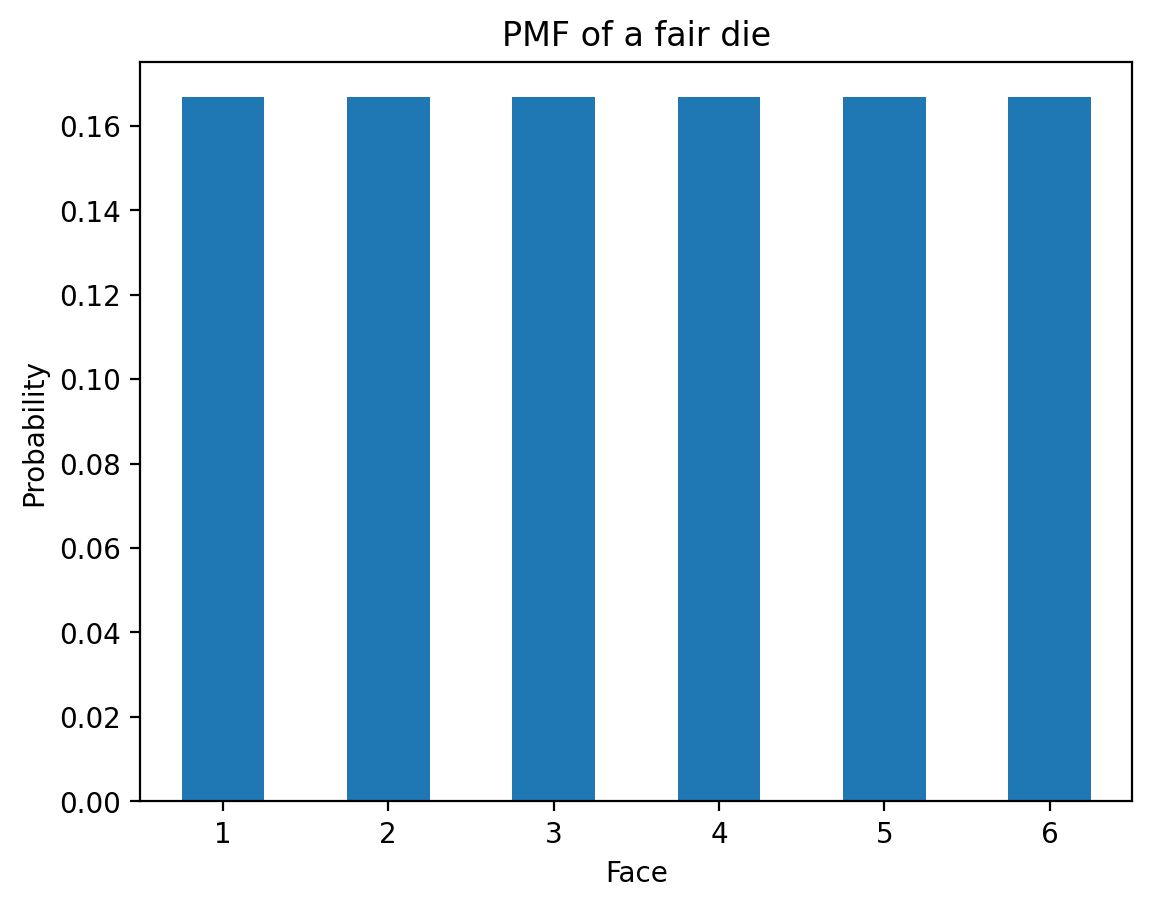

In [4]:
# Difference between histrogram and PMF

die_pmf = pd.Series([1/6]*6, index=[1,2,3,4,5,6])
die_pmf.plot(kind='bar', rot = 0)
plt.xlabel('Face')
plt.ylabel('Probability')
plt.title('PMF of a fair die')

In [5]:
# Now, histogram over "N" rolls of the die
def die_hist(N):
    rolls = np.random.randint(1, 7, N)
    fig, ax = plt.subplots()
    hist = pd.Series(rolls).value_counts(normalize=True).sort_index()
    hist.plot(kind='bar', rot=0, ax=ax, label='Histogram', alpha=0.5, color='C0')
    ax.set_xlabel('Face')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {N} rolls of a fair die')

    # Plot ideal 
    die_pmf.plot(kind='bar', rot = 0, ax=ax, alpha=0.5, label='PMF', color='C1')
    ax.legend()
    

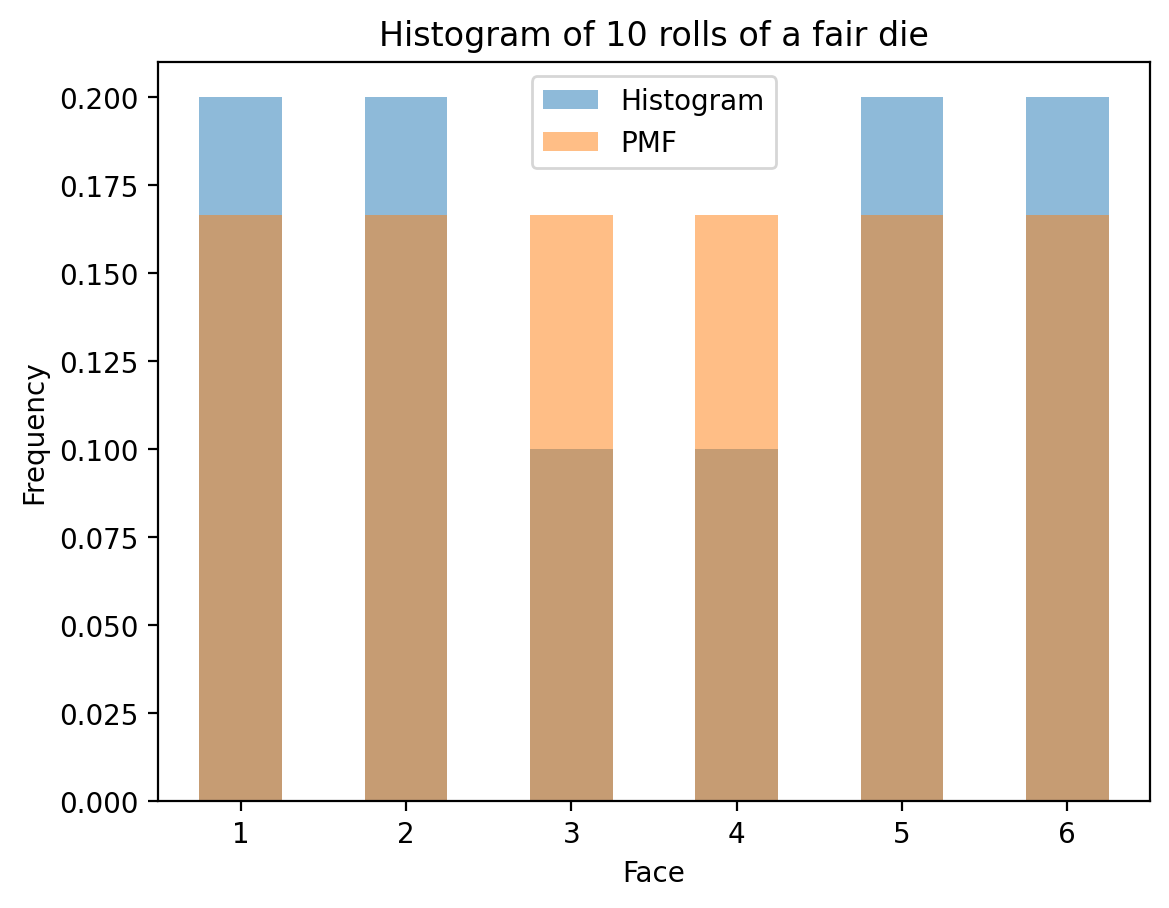

In [6]:
die_hist(10)


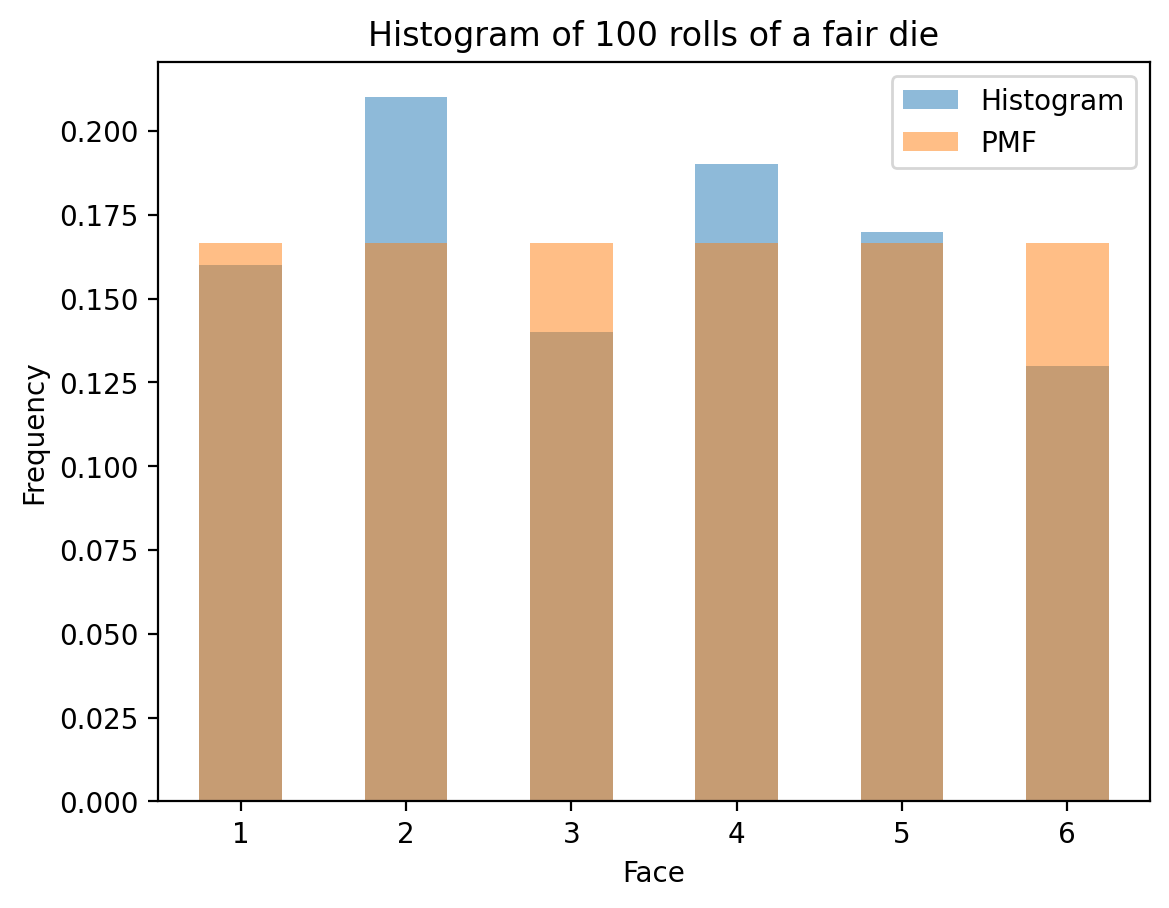

In [7]:
die_hist(100)


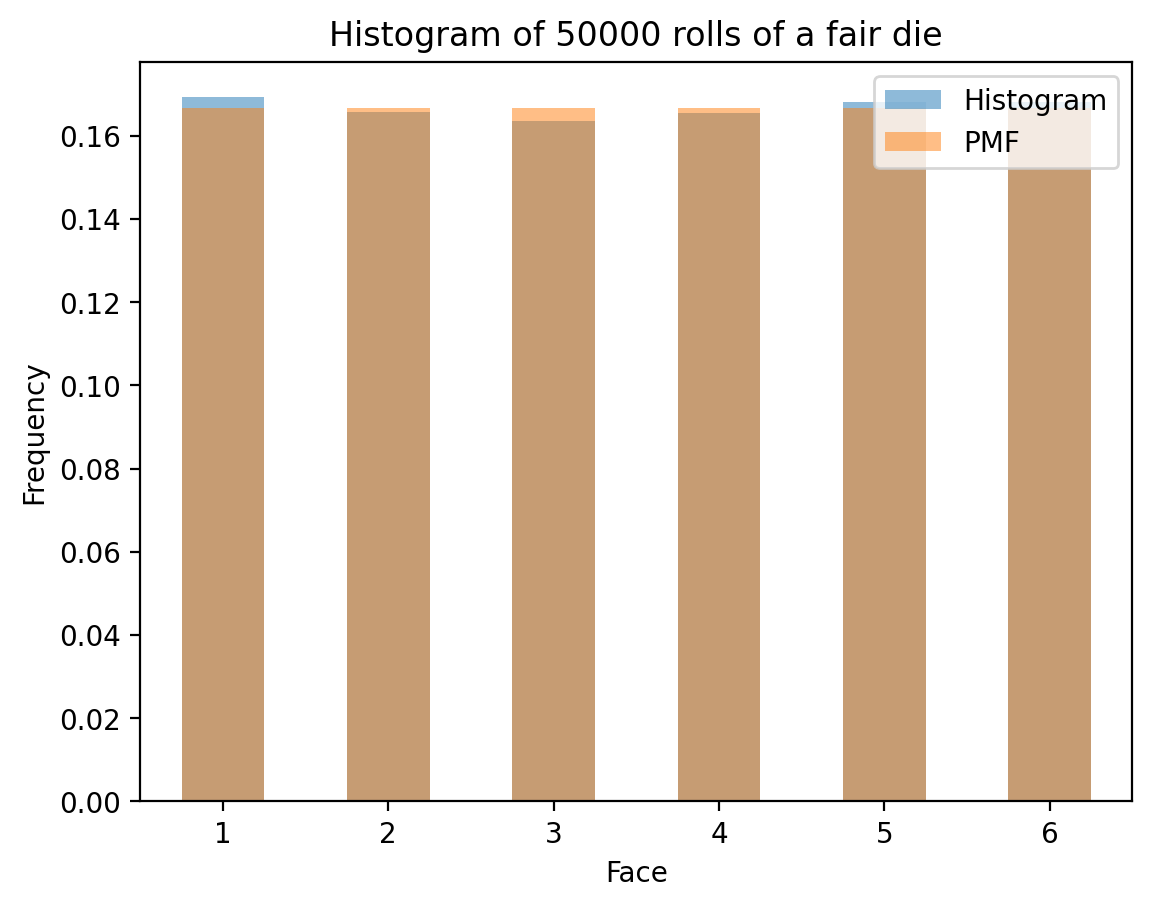

In [8]:
die_hist(50000)

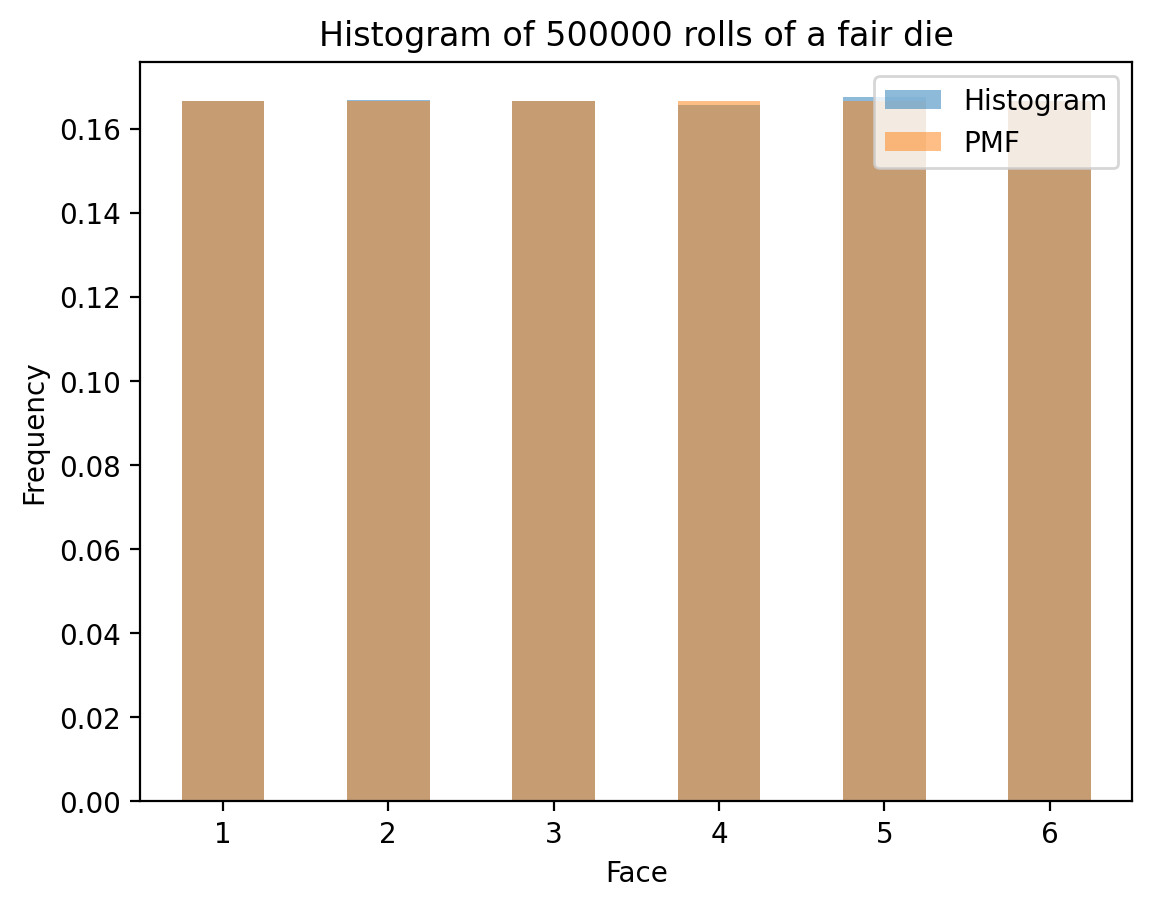

In [9]:
die_hist(500000)

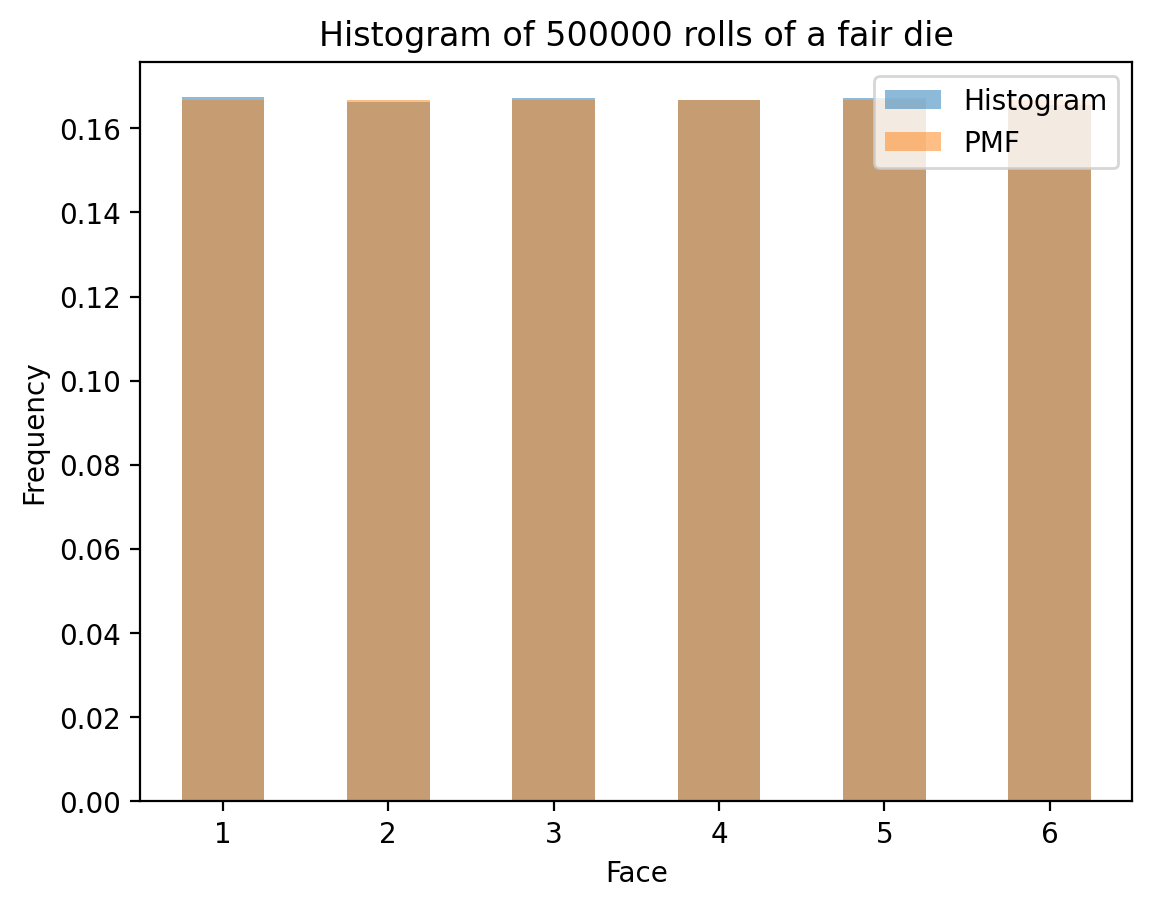

In [10]:
die_hist(500000)